In [32]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import numpy as np
from scipy import signal

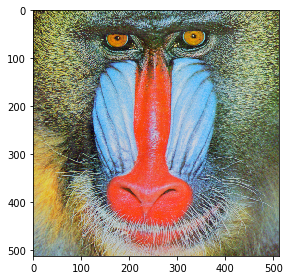

In [33]:
image_ori = io.imread ('C:/Users/dhruv/Desktop/College/NOTES/IVP/Labs/baboon.png')
io.imshow(image_ori)

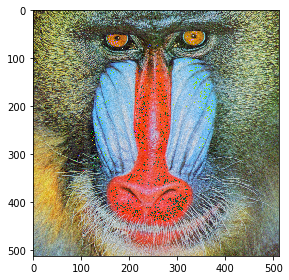

In [34]:
#reduce noise by avergaing filter
image = image_ori
sh= image.shape

#add gaussian noise
mean = 0
sigma = 10
gaussian_noise  = np.random.normal (mean,sigma,(sh[0],sh[1]))
image_gn = image.copy ()
image_gn[:,:,0] = image [:,:,0]+gaussian_noise
image_gn[:,:,1] = image [:,:,1]+gaussian_noise
image_gn[:,:,2] = image [:,:,2]+gaussian_noise
io.imshow(image_gn)

In [40]:
#constructing avg filter
size = 3
avg_filter = np.ones((size,size))/(size*size)
print (avg_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


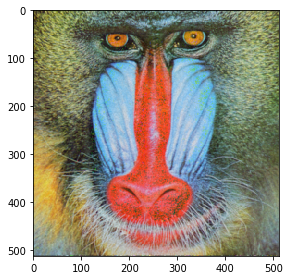

In [41]:
image_avg = image_gn.copy()
image_avg [:,:,0] = signal.convolve2d(image_gn[:,:,0],avg_filter,mode='same')
image_avg [:,:,1] = signal.convolve2d(image_gn[:,:,1],avg_filter,mode='same')
image_avg [:,:,2] = signal.convolve2d(image_gn[:,:,2],avg_filter,mode='same')
io.imshow (image_avg)

Text(0.5, 1, 'Image After Averaging')

<Figure size 432x288 with 0 Axes>

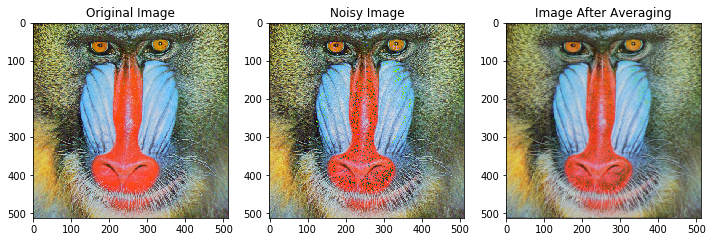

In [42]:
plt.figure()
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
io.imshow (image)
plt.title ('Original Image')

plt.subplot(1,3,2)
io.imshow (image_gn)
plt.title ('Noisy Image')

plt.subplot(1,3,3)
io.imshow (image_avg)
plt.title ('Image After Averaging')

(512, 512)

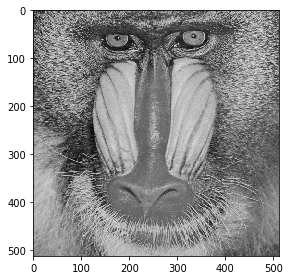

In [47]:
#median filter to remove salt pepper noise
from random import randint,seed

image = rgb2gray (image)  
io.imshow (image)
sh=image.shape

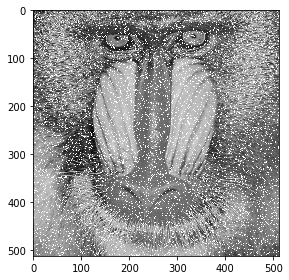

In [79]:
image_sp = image.copy ()

#portion of image corrupted by noise, defined by a
a=0.1   #10% of image
sp_numb = int (sh[0]*sh[1]*a)  #number of pixels to be corrupted

sp_val=1 #value of noise
seed (1)

for i in range (0,sp_numb):
    temp1=randint (0,sh[0]-1)
    temp2= randint (0,sh[1]-1)
    image_sp [temp1][temp2] = sp_val
    
io.imshow (image_sp)

In [80]:
img_spfilt = image_sp.copy()
size = 3

#centre of mask 
cent = int ((size-1)/2)

#median
med = int (((size*size)-1)/2)

for row in range (0,sh[0]-size):
    for col in range (0,sh[1]-size):
        temp1 = image_sp [row:row+size,col:col+size]
        temp2 = np.reshape (temp1,(1,size*size))
        temp3 = np.sort (temp2)
        img_spfilt[row+cent][col+cent]=temp3[0][med]

Text(0.5, 1, 'Image After median Filter')

<Figure size 432x288 with 0 Axes>

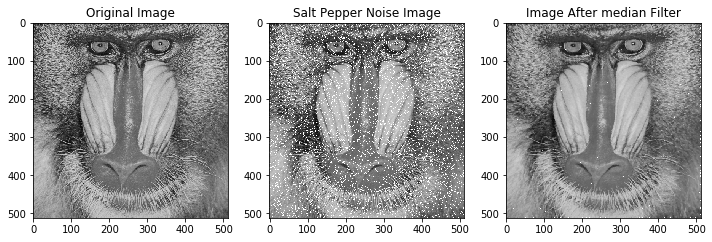

In [81]:
plt.figure()
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
io.imshow (image)
plt.title ('Original Image')

plt.subplot(1,3,2)
io.imshow (image_sp)
plt.title ('Salt Pepper Noise Image')

plt.subplot(1,3,3)
io.imshow (img_spfilt)
plt.title ('Image After median Filter')